# Assignment 1 - Milestone 1
 - Course: Data Science for Public Policy  
 - Student Name: YU Kaijin
 - Title: Analysis of Rice Market Price Support: Japan vs Vietnam (1986-2023)

Country        Japan           Vietnam
Year                                  
1986     6293.362143               0.0
1987     5649.230901               0.0
1988     5377.221658               0.0
1989     5275.287989               0.0
1990     4831.135727               0.0
1991     4739.543998               0.0
1992     5447.501855               0.0
1993     5053.508856               0.0
1994     6240.261676               0.0
1995     5634.594227               0.0
1996     5083.327212               0.0
1997      4371.68487               0.0
1998     4732.948199               0.0
1999      4873.93117               0.0
2000     4809.201589   11708376.663324
2001     4359.053584   15043142.794165
2002     4378.930584   -5996661.562816
2003     4353.219738   14806289.125943
2004     4005.561047   15102073.074332
2005     3875.253501    16482452.25902
2006     3647.266674   10926732.113416
2007     3204.604507   -8836703.008349
2008     3357.822566 -124610240.502069
2009     3247.964823   51

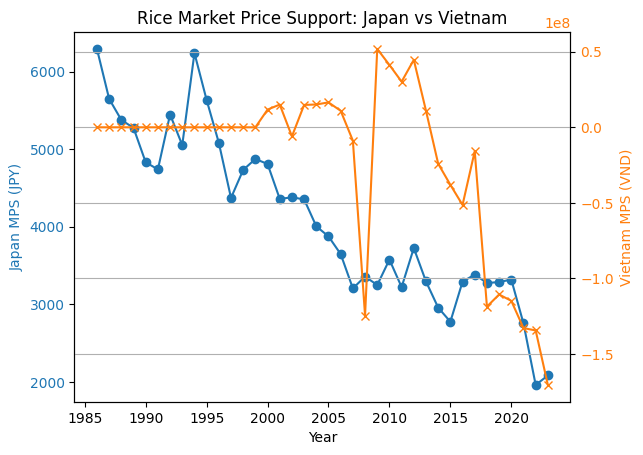

In [16]:
# Step1 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


# Step2 Define Functions
def load_rice_mps(file_path):
    """
    Load the 'TOTAL' sheet from the Excel file and extract the Market Price Support (MPS) data for Rice.
    """
    # Read the entire sheet
    df = pd.read_excel(file_path, sheet_name='TOTAL', header=None)

    # Find the row that contains 'Rice' (searching within the second column)
    rice_row_index = df[df[1].astype(str).str.contains('Rice', na=False, case=False)].index[0]

    # Extract data from column 'at' to 'ce' (Python index 45 to 82)
    rice_values = df.iloc[rice_row_index, 45:83].values

    # Generate a list of years from 1986 to 2023
    years = list(range(1986, 2024))

    # Create a clean DataFrame
    df_rice = pd.DataFrame({
        'Year': years,
        'MPS_Value': rice_values
    })

    return df_rice


# Step3 Load and Combine Data
# Load Japan data
df_jpn_rice = load_rice_mps('../Data/pse-jpn-2024.xls')
df_jpn_rice['Country'] = 'Japan'

# Load Vietnam data
df_vnm_rice = load_rice_mps('../Data/pse-vnm-2024.xls')
df_vnm_rice['Country'] = 'Vietnam'

# Merge both datasets
df_rice_all = pd.concat([df_jpn_rice, df_vnm_rice], ignore_index=True)

# Pivot the data to have countries as columns
df_pivot = df_rice_all.pivot(index='Year', columns='Country', values='MPS_Value')
print(df_pivot)


# Step4 Visualization
fig, ax1 = plt.subplots()

# Plot for Japan on the left Y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Japan MPS (JPY)', color=color)
ax1.plot(df_pivot.index, df_pivot['Japan'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Plot for Vietnam on the right Y-axis
ax2 = ax1.twinx()  # Create a second Y-axis sharing the same X-axis

color = 'tab:orange'
ax2.set_ylabel('Vietnam MPS (VND)', color=color)
ax2.plot(df_pivot.index, df_pivot['Vietnam'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Rice Market Price Support: Japan vs Vietnam')
plt.grid(True)
plt.show()

## Conclusion
 - Japan's rice market price support (MPS) shows a steady downward trend from 1986 to 2023.
 - Vietnam's MPS data appeared after 2000, showing significant fluctuations, reflecting unstable agricultural policy changes.
 - The dual-axis graph clearly highlights the differences in magnitude and trend between the two countries.
 - Indexing or normalization may be considered for a more precise comparison in future analyses.
 - Because the United States does not have MPS data, I mainly compared Japan and Vietnam.